In [1]:
from joblib import dump
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
df_train = pd.read_csv('diabetes.csv')
df_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
print(df_train.shape)

(768, 9)


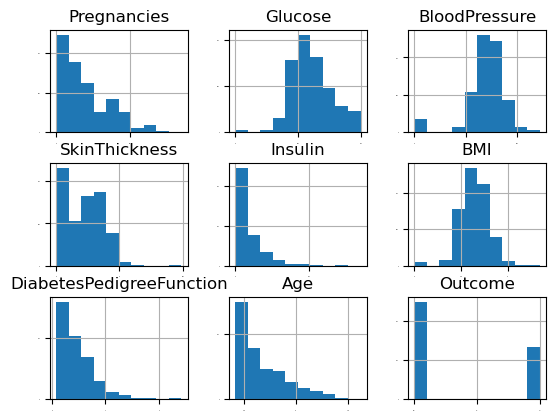

In [4]:
df_train.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1)
plt.show()

In [5]:
static_data, stream_data = train_test_split(df_train, test_size=0.8, random_state=42)
stream_data.to_csv('stream_data.csv')
static_data = static_data.reset_index(drop=True)
stream_data = stream_data.reset_index(drop=True)
df_train = static_data

In [6]:
from sklearn.linear_model import LogisticRegression
x, y = df_train.iloc[:, :-1].astype(float), df_train.iloc[:, -1]
print(x.shape)

(153, 8)


In [7]:
logistic_reg_model = LogisticRegression(solver="lbfgs", max_iter=200)
logistic_reg_model.fit(x, y)
dump(logistic_reg_model, './LR_model.joblib')

['./LR_model.joblib']